In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cmocean.cm as cmo
plt.rcParams['figure.facecolor'] = 'white'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [2]:
path = "../data_for_plots/" 

In [3]:
power = xr.open_dataset(path + "zonal_eke_spectra_0291-0300.nc")

In [4]:
Ro = xr.open_dataset(path + "meanRossbyRadius.nc").Ro

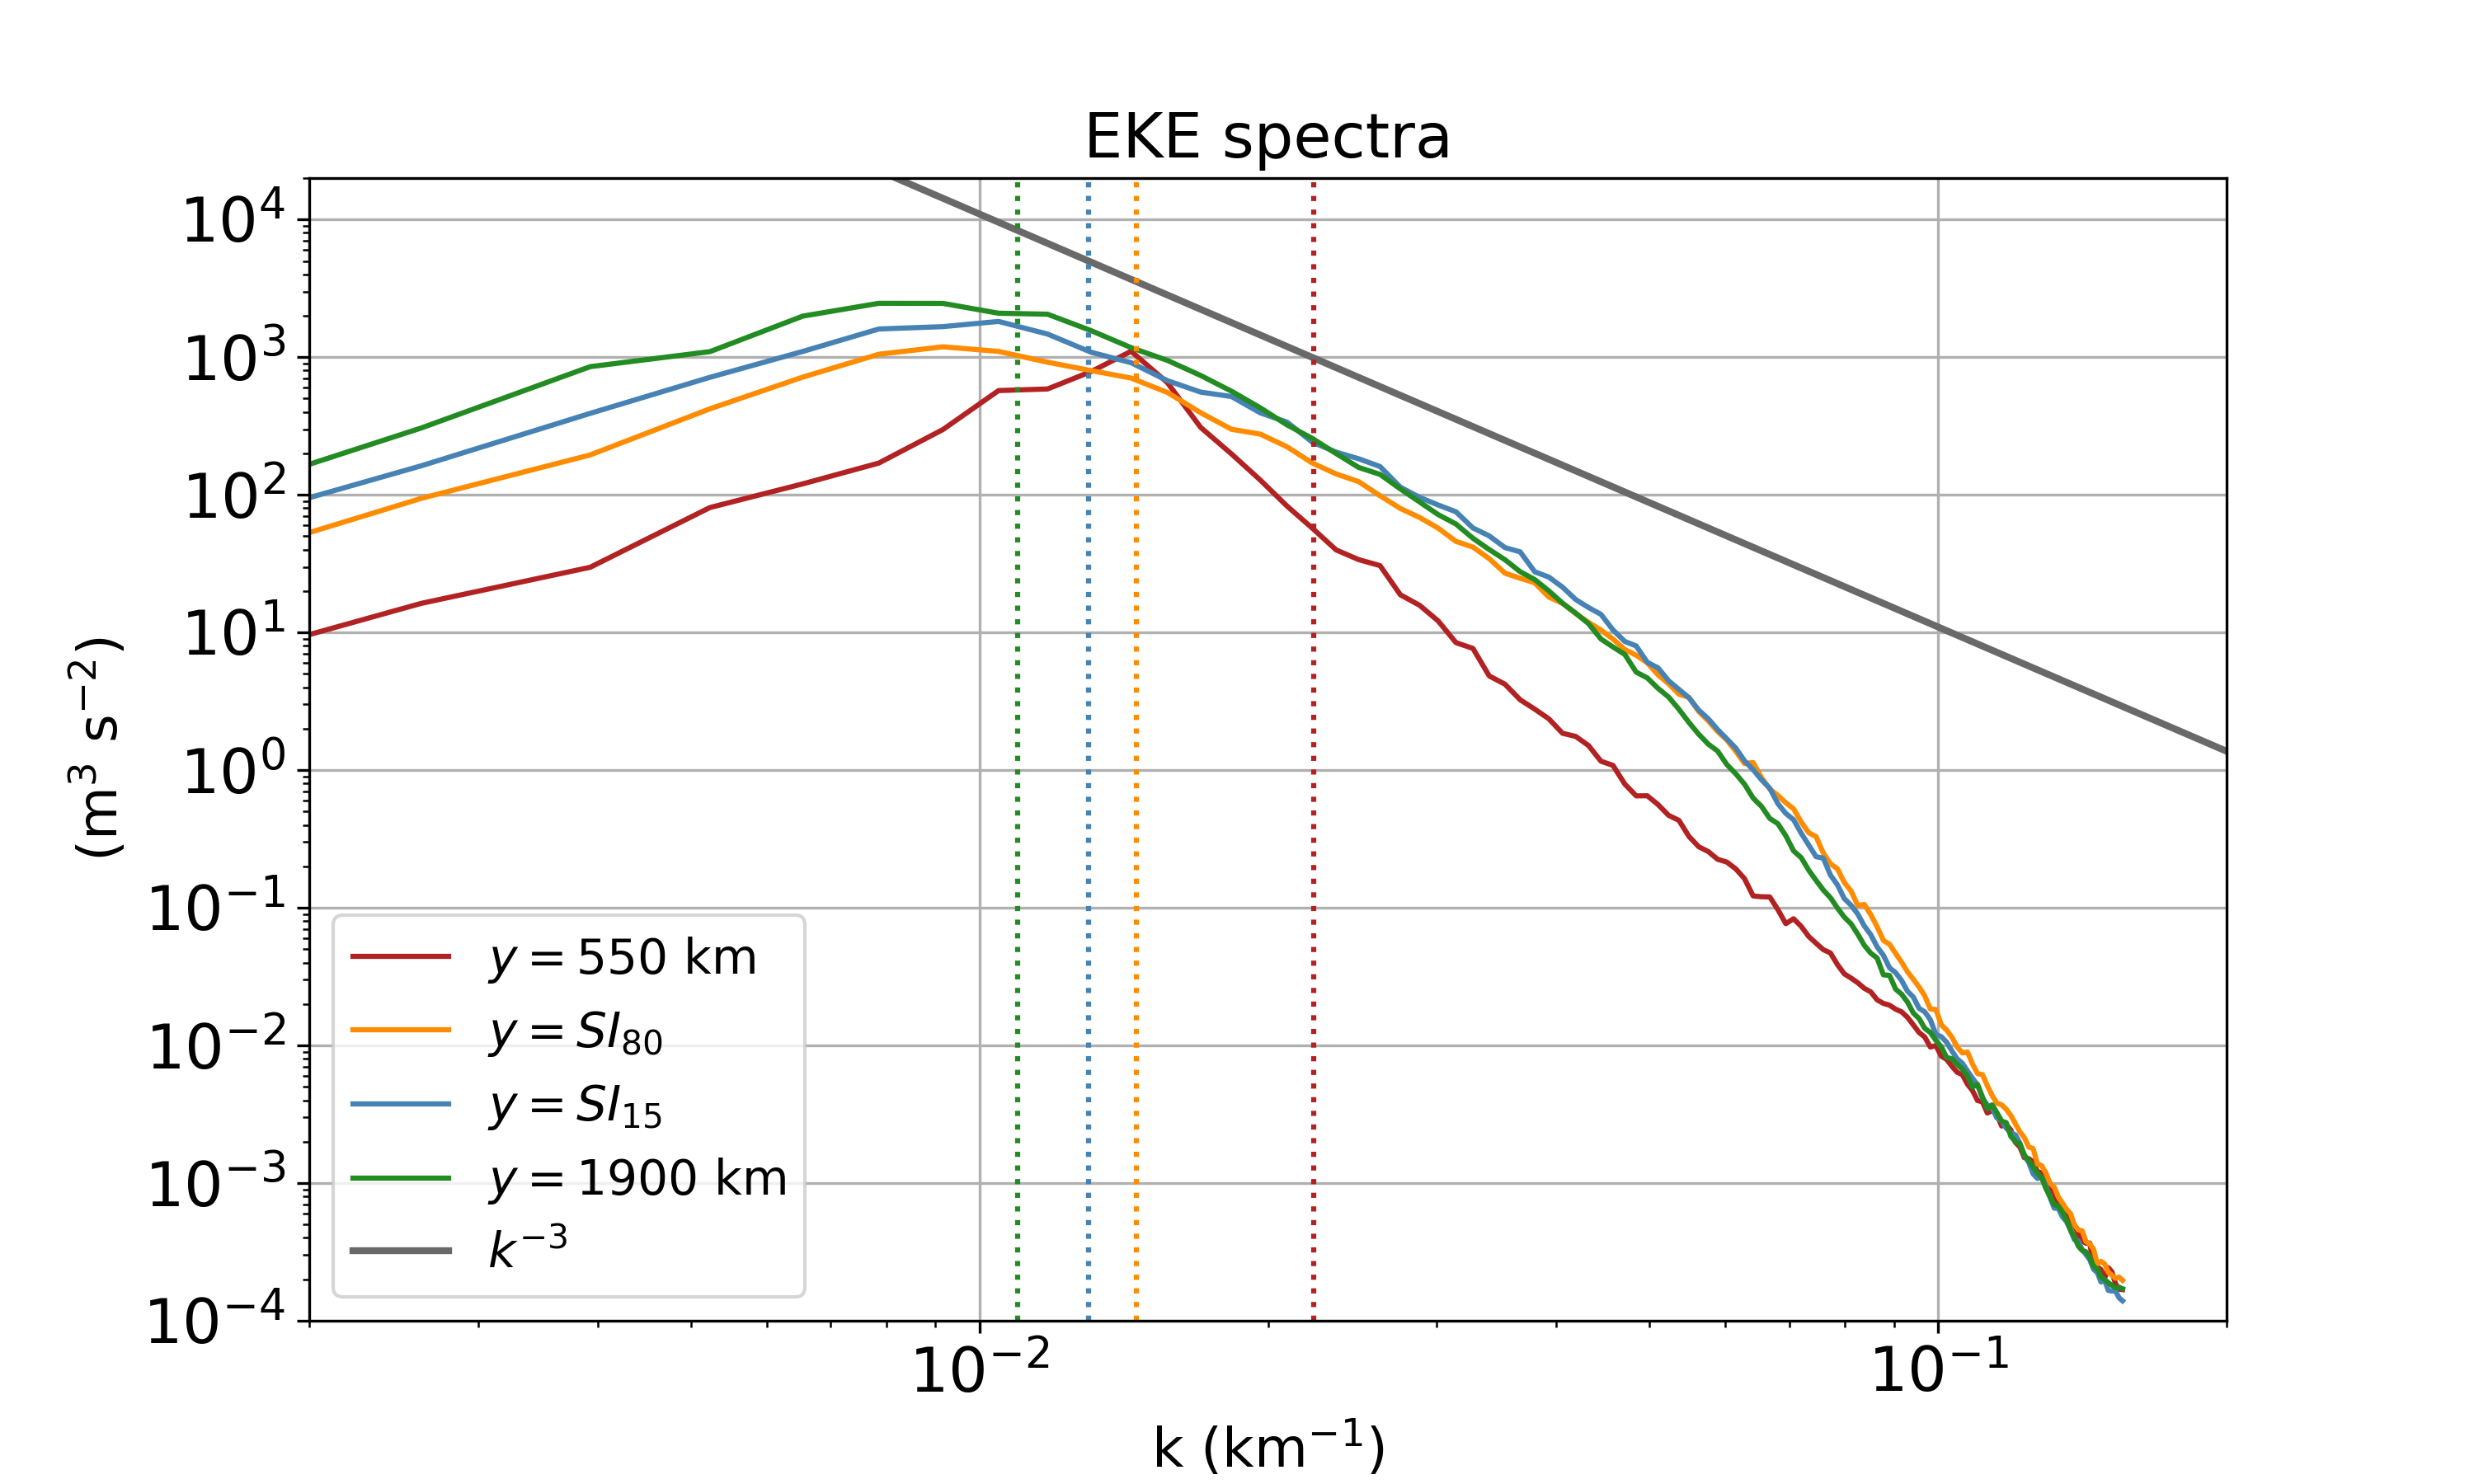

In [7]:
fig, ax = plt.subplots(figsize=(10,6),dpi=300)

plt.plot(power.wavenumber, power.power.isel(YG=55), color="firebrick", label=r"$y=550$ km")
plt.plot(power.wavenumber, power.power.isel(YG=120), color="darkorange", label=r"$y=SI_{80}$")
plt.plot(power.wavenumber, power.power.isel(YG=157), color="steelblue", label=r"$y=SI_{15}$")
plt.plot(power.wavenumber, power.power.isel(YG=190), color="forestgreen", label=r"$y=1900$ km")


## need to include the Rossby radius
plt.plot(np.linspace(4e-3, 4e-1, 10), np.linspace(18e-3, 18e-1, 10)**(-3), color="dimgray", linewidth=2, label=r'$k^{-3}$')

plt.xscale('log')
plt.yscale('log')
plt.title('EKE spectra', fontsize=18)
plt.ylim([1e-4, 2e4])
plt.xlim([2e-3, 2e-1])

plt.vlines(1/(2 * Ro.mean("XC")[80] * 1e-3), 1e-4, 2e4, color="firebrick", linestyle=":")
plt.vlines(1/(2 * Ro.mean("XC")[157] * 1e-3), 1e-4, 2e4, color="darkorange", linestyle=":")
plt.vlines(1/(2 * Ro.mean("XC")[190] * 1e-3), 1e-4, 2e4, color="steelblue", linestyle=":")
plt.vlines(1/(2 * Ro.mean("XC")[240] * 1e-3), 1e-4, 2e4, color="forestgreen", linestyle=":")

plt.grid()
plt.legend(fontsize=14)

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k (km$^{-1}$)',fontsize=16)
ax.set_ylabel(r'(m$^3$ s$^{-2}$)',fontsize=16)

plt.savefig('figS02-EKE_spectra.png', dpi=300)